In [1]:
#Basics
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Stats and Modeling
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

#Module
from wrangle import wrangle_zillow

## Scaling

#### Get Data

In [2]:
#get data and use split of 70/15/15
tr, te, val = wrangle_zillow(val_ratio=.15,test_ratio=.15)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495897 entries, 1945062 to 964515
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   value       1495897 non-null  float64
 1   county      1495897 non-null  object 
 2   bed         1495897 non-null  int64  
 3   bath        1495897 non-null  float64
 4   sf          1495897 non-null  float64
 5   yearbuilt   1495897 non-null  int64  
 6   Orange_CA   1495897 non-null  uint8  
 7   Ventura_CA  1495897 non-null  uint8  
dtypes: float64(3), int64(2), object(1), uint8(2)
memory usage: 82.7+ MB


#### Split data into modeling dataframes

In [4]:
#drop target and category columns for eda
X_tr = tr.iloc[:,2:-2]
#pull out target
y_tr = tr.iloc[:,0]

#repeat for test and validate
X_te = te.iloc[:,2:-2]
y_te = te.iloc[:,0]
X_val = val.iloc[:,2:-2]
y_val = val.iloc[:,0]

In [5]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495897 entries, 1945062 to 964515
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bed        1495897 non-null  int64  
 1   bath       1495897 non-null  float64
 2   sf         1495897 non-null  float64
 3   yearbuilt  1495897 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 57.1 MB


### Scaling
- Min/Max
- Standardization
- Robust

#### min/max scaling
Create X_train datasets for these

In [6]:
#MIN MAX SCALER
scaler = MinMaxScaler()
#Fit and transform train
X_tr_mm_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

#STANDARDIZATION SCALER
scaler = StandardScaler()
#Fit and transform train
X_tr_st_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)

##################

#ROBUST SCALER
scaler = RobustScaler()
#Fit and transform train
X_tr_r_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)

##################

#### Visualize the original X train vs the scaled versions

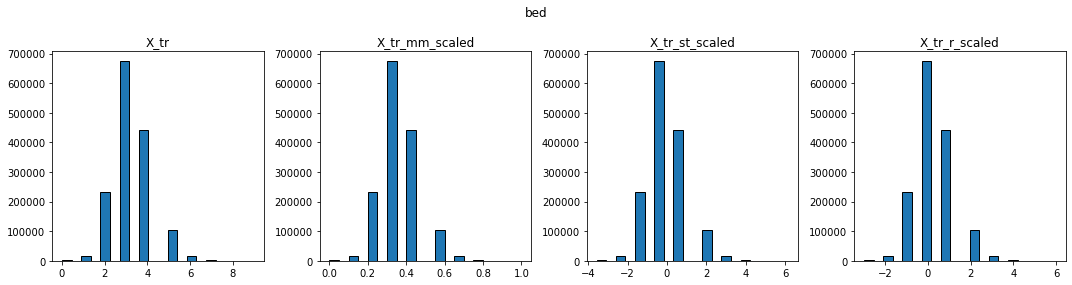

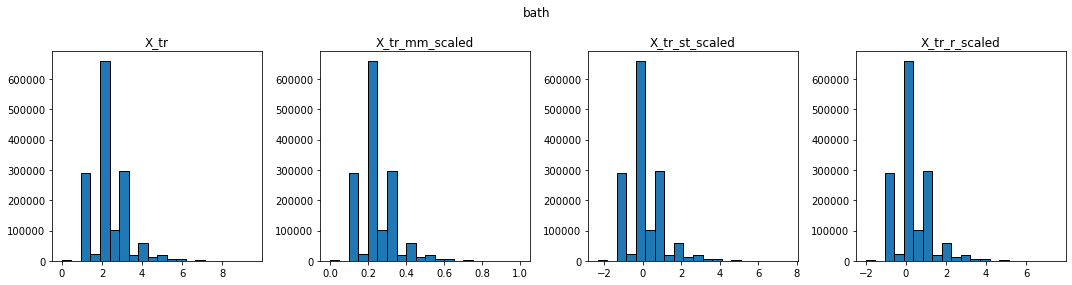

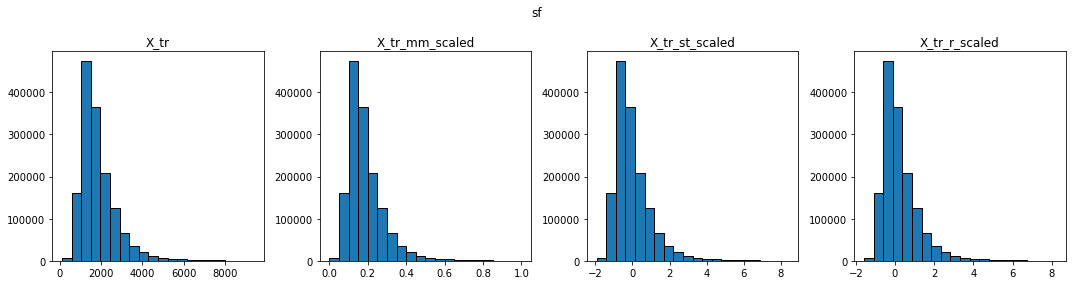

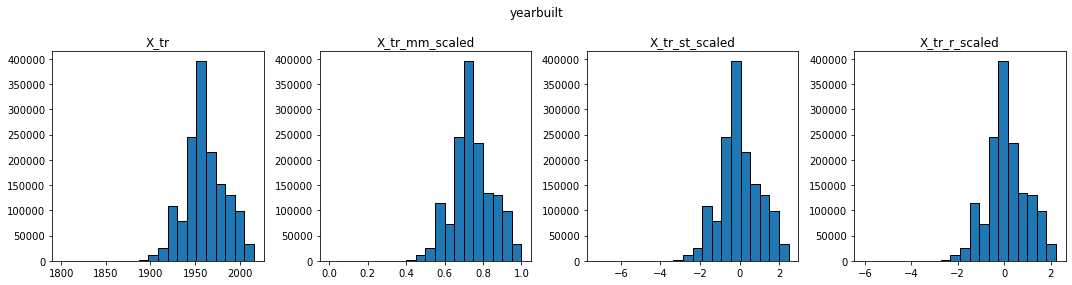

In [7]:
#values to loop over
lst = [X_tr, X_tr_mm_scaled, X_tr_st_scaled, X_tr_r_scaled]
lst_str = ['X_tr', 'X_tr_mm_scaled', 'X_tr_st_scaled', 'X_tr_r_scaled']

for c in X_tr.columns:
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(c)
    ct=0
    for x in lst:
        ct +=1
        plt.subplot(1,4,ct)
        plt.hist(x[c],bins=20,ec='black')
        plt.title(lst_str[ct-1])
        
    plt.tight_layout()

#### Now use inverse_transform to check you get the same X_tr

In [8]:
(X_tr == scaler.inverse_transform(X_tr_r_scaled)).sort_values(by='sf')
#Oddly some falses

,bed,bath,sf,yearbuilt
1306630,True,True,False,True
393032,True,True,False,True
1499505,True,True,False,True
1210021,True,True,False,True
1852118,True,True,False,True
...,...,...,...,...
287832,True,True,True,True
535650,True,True,True,True
1124437,True,True,True,True
602622,True,True,True,True


In [9]:
#But if we look at the actual sf values for one of those rows, we can see that they are the same (both 1989)
X_tr.iloc[393032,:]

bed             3.0
bath            2.0
sf           1989.0
yearbuilt    1966.0
Name: 814269, dtype: float64

In [10]:
scaler.inverse_transform(X_tr_r_scaled)[393032,:]

array([   3.,    2., 1989., 1966.])

It does seem to inverse the data well, but there may be some kind of small conversion error.

#### Now use Quantile Transformer

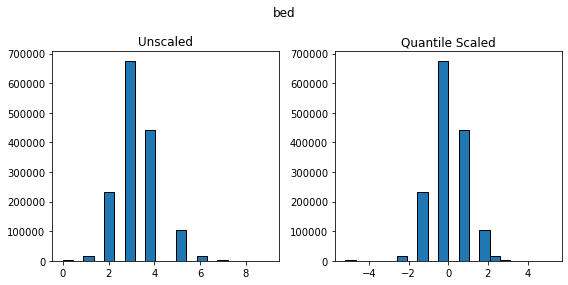

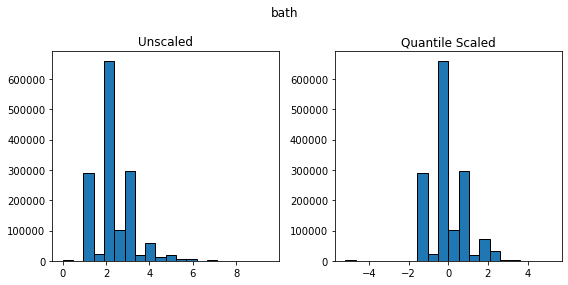

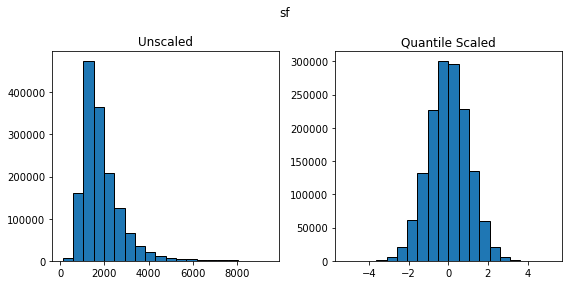

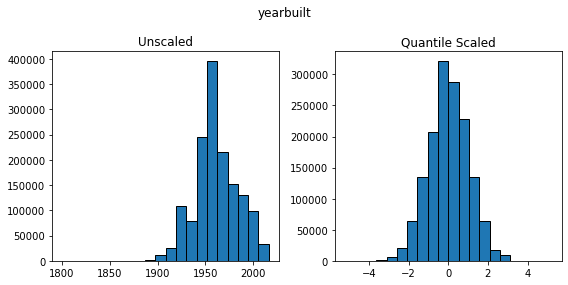

In [11]:
#QUANTILE SCALER - using normal output_distribution
scaler = QuantileTransformer(output_distribution='normal')
#Fit and transform train
X_tr_q_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

for c in X_tr.columns:
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(c)
    plt.subplot(1,2,1)
    plt.hist(X_tr[c],bins=20,ec='k')
    plt.title('Unscaled')
    plt.subplot(1,2,2)
    plt.hist(X_tr_q_scaled[c],bins=20,ec='k')
    plt.title('Quantile Scaled')
    plt.tight_layout()

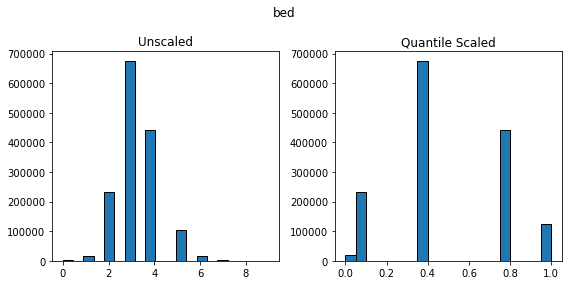

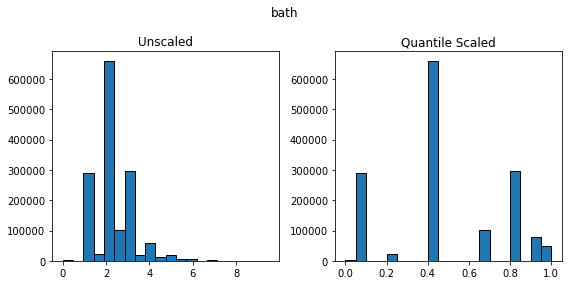

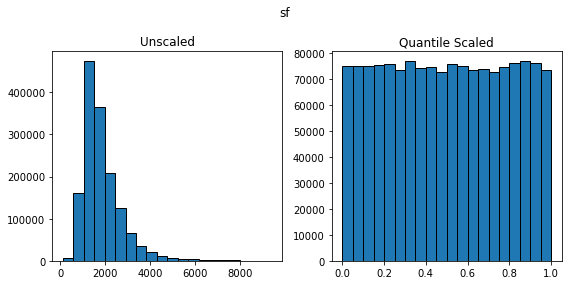

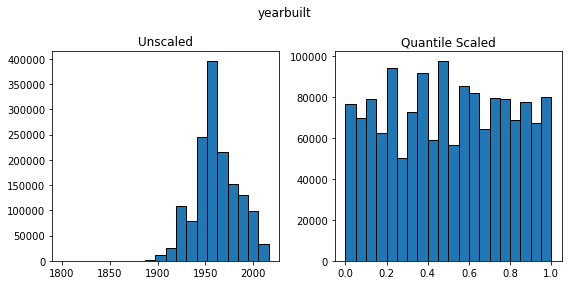

In [12]:
#QUANTILE SCALER - using output_distribution default of 'uniform'
scaler = QuantileTransformer()
#Fit and transform train
X_tr_q_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

for c in X_tr.columns:
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(c)
    plt.subplot(1,2,1)
    plt.hist(X_tr[c],bins=20,ec='k')
    plt.title('Unscaled')
    plt.subplot(1,2,2)
    plt.hist(X_tr_q_scaled[c],bins=20,ec='k')
    plt.title('Quantile Scaled')
    plt.tight_layout()

#### Scaling for Zillow dropped into wrangle.py

#### Test the function

In [13]:
from wrangle import scale_zillow

In [14]:
help(scale_zillow)

Help on function scale_zillow in module wrangle:

scale_zillow(tr, te, val, **kwargs)
    Takes prepped tr, test, validate zillow subsets. Scales the non-categorical independent variables and       returns dataframes of the same structure.  Expects pandas dataframes with the following columns,           in order: cols = ['value', 'county', 'bed', 'bath', 'sf', 'yearbuilt', 'Orange_CA', 'Ventura_CA']
    
    Returns: 3 Pandas DataFrames (Train, Test, Validate)
    Inputs:
           (R) tr: train dataset
           (R) te: test dataset
          (R) val: validate dataset
      (O-kw) kind: Type of scaler you want to use.  Default: minmax
                Options: minmax, standard, robust



In [18]:
#Test default/wrong input
tr_mm, te_mm, val_mm = scale_zillow(tr,te,val,kind='wrongword')

Invalid entry for "kind", default MinMax scaler used


In [19]:
tr.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1495897.0,448205.520860,514365.214992,22.0,188976.0,327673.0,533080.0,9995000.0
bed,1495897.0,3.297629,0.924012,0.0,3.0,3.0,4.0,9.0
bath,1495897.0,2.232423,0.964052,0.0,2.0,2.0,3.0,9.5
sf,1495897.0,1850.181271,897.626579,120.0,1257.0,1622.0,2204.0,9407.0
yearbuilt,1495897.0,1960.929052,22.127073,1801.0,1949.0,1958.0,1975.0,2016.0
Orange_CA,1495897.0,0.257928,0.437494,0.0,0.0,0.0,1.0,1.0
Ventura_CA,1495897.0,0.076170,0.265271,0.0,0.0,0.0,0.0,1.0


In [20]:
tr_mm.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1495897.0,448205.520860,514365.214992,22.0,188976.000000,327673.000000,533080.000000,9995000.0
bed,1495897.0,0.366403,0.102668,0.0,0.333333,0.333333,0.444444,1.0
bath,1495897.0,0.234992,0.101479,0.0,0.210526,0.210526,0.315789,1.0
sf,1495897.0,0.186301,0.096654,0.0,0.122429,0.161731,0.224400,1.0
yearbuilt,1495897.0,0.743856,0.102917,0.0,0.688372,0.730233,0.809302,1.0
Orange_CA,1495897.0,0.257928,0.437494,0.0,0.000000,0.000000,1.000000,1.0
Ventura_CA,1495897.0,0.076170,0.265271,0.0,0.000000,0.000000,0.000000,1.0


In [21]:
#Test standard scaler
tr_st, te_st, val_st = scale_zillow(tr,te,val,kind='standard')

In [22]:
tr_st.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1495897.0,4.482055e+05,514365.214992,22.000000,188976.000000,327673.000000,533080.000000,9.995000e+06
bed,1495897.0,-2.442965e-15,1.000000,-3.568817,-0.322105,-0.322105,0.760132,6.171320e+00
bath,1495897.0,-2.821513e-16,1.000000,-2.315667,-0.241090,-0.241090,0.796199,7.538575e+00
sf,1495897.0,6.334719e-18,1.000000,-1.927507,-0.660833,-0.254205,0.394172,8.418669e+00
yearbuilt,1495897.0,-5.339222e-15,1.000000,-7.227757,-0.539116,-0.132374,0.635916,2.488850e+00
Orange_CA,1495897.0,2.579275e-01,0.437494,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Ventura_CA,1495897.0,7.617035e-02,0.265271,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [23]:
#Test stanrobustdard scaler
tr_r, te_r, val_r = scale_zillow(tr,te,val,kind='robust')

In [24]:
tr_r.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1495897.0,448205.520860,514365.214992,22.000000,188976.000000,327673.0,533080.000000,9.995000e+06
bed,1495897.0,0.297629,0.924012,-3.000000,0.000000,0.0,1.000000,6.000000e+00
bath,1495897.0,0.232423,0.964052,-2.000000,0.000000,0.0,1.000000,7.500000e+00
sf,1495897.0,0.240952,0.947863,-1.586061,-0.385428,0.0,0.614572,8.220697e+00
yearbuilt,1495897.0,0.112656,0.851041,-6.038462,-0.346154,0.0,0.653846,2.230769e+00
Orange_CA,1495897.0,0.257928,0.437494,0.000000,0.000000,0.0,1.000000,1.000000e+00
Ventura_CA,1495897.0,0.076170,0.265271,0.000000,0.000000,0.0,0.000000,1.000000e+00
